In [2]:
import pandas, sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

datafile_16 = "Resources/FY_2016_Dallas_Animal_Shelter_Data.csv"
datafile_17 = "Resources/FY_2017_Dallas_Animal_Shelter_Data.csv"
datafile_18 = "Resources/FY_2018_Dallas_Animal_Shelter_Data.csv"
datafile_19 = "Resources/FY_2019_Dallas_Animal_Shelter_Data.csv"
datafile_20 = "Resources/FY2020_Dallas_Animal_Shelter_Data.csv"
datafile_21 = "Resources/FY2021_Dallas_Animal_Shelter_Data.csv"

df_2016 = pd.read_csv(datafile_16)
df_2017 = pd.read_csv(datafile_17)
df_2018 = pd.read_csv(datafile_18)
df_2019 = pd.read_csv(datafile_19)
df_2020 = pd.read_csv(datafile_20)
df_2021 = pd.read_csv(datafile_21)

In [3]:
frames = [df_2016, df_2017, df_2018, df_2019, df_2020, df_2021]
dallas_shelter_df = pd.concat(frames)

In [4]:
dallas_shelter_df

,Animal Id,Animal Type,Animal Breed,Kennel Number,Kennel Status,Tag Type,Activity Number,Activity Sequence,Source Id,Census Tract,...,Service Request Number,Outcome Condition,Chip Status,Animal Origin,Additional Information,Month,Year,Unnamed: 16,Outcome Subtype,Unnamed: 27
0,A0000000,NaN,NaN,FREEZER,UNAVAILABLE,NaN,A16-017406,1,P0000000,701,...,NaN,UNHEALTHY UNTREATABLE NON-CONTAGIOUS,UNABLE TO SCAN,FIELD,NaN,JUN.2016,FY2016,NaN,NaN,NaN
1,A0001656,DOG,LABRADOR RETR,LAB 01,LAB,NaN,NaN,1,P0003571,20500,...,NaN,TREATABLE REHABILITABLE NON-CONTAGIOUS,SCAN CHIP,OVER THE COUNTER,NaN,JUL.2016,FY2016,NaN,NaN,NaN
2,A0014681,DOG,PIT BULL,PAWS 24,UNAVAILABLE,NaN,NaN,1,P0721470,12302,...,50020,TREATABLE MANAGEABLE NON-CONTAGIOUS,SCAN NO CHIP,FIELD,TAGGHOUSEBROKEN/FREE ADOPT,FEB.2016,FY2016,NaN,NaN,NaN
3,A0117773,DOG,PIT BULL,LAB 01,LAB,NaN,NaN,1,P0062546,2200,...,NaN,UNHEALTHY UNTREATABLE NON-CONTAGIOUS,SCAN NO CHIP,OVER THE COUNTER,NaN,JUL.2016,FY2016,NaN,NaN,NaN
4,A0119934,CAT,RUSSIAN BLUE,LOST,LOST REPORT,NaN,NaN,1,P0038200,75214,...,NaN,HEALTHY,UNABLE TO SCAN,OVER THE COUNTER,NaN,JUL.2016,FY2016,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11017,A0701527,DOG,SCHNAUZER STAND,LFSD 03,IMPOUNDED,NaN,A21-259221,1,P0954698,12206,...,NaN,APP WNL,SCAN CHIP,FIELD,ITR,APR.2021,FY2021,NaN,WESTMORELD,NaN
11018,A1118116,CAT,DOMESTIC SH,N04,UNAVAILABLE,NaN,NaN,1,P0954696,7823,...,NaN,UNDERAGE,SCAN NO CHIP,OVER THE COUNTER,AEG,APR.2021,FY2021,NaN,UNDERAGE,NaN
11019,A1116166,DOG,GERM SHEPHERD,LOST,IMPOUNDED,NaN,NaN,0,P0951768,NaN,...,NaN,NaN,NaN,NaN,NaN,MAR.2021,FY2021,NaN,OTHER,NaN
11020,A1117299,DOG,PIT BULL,AD 003,AVAILABLE,NaN,NaN,1,P0900636,3901,...,NaN,APP WNL,SCAN NO CHIP,OVER THE COUNTER,JAS,APR.2021,FY2021,NaN,WESTMORELD,NaN


In [5]:
dup_animals = dallas_shelter_df.loc[dallas_shelter_df.duplicated(subset = ['Animal Id', 'Month']), 'Animal Id'].unique()
dup_animal_id = pd.DataFrame(dup_animals)
dup_animal_id

,0
0,A0469113
1,A0489693
2,A0578637
3,A0660996
4,A0696700
...,...
6899,A1117310
6900,A1118114
6901,A1117945
6902,A1116461


In [6]:
dallas_shelter_clean = dallas_shelter_df[dallas_shelter_df['Animal Id'].isin(dup_animals)==False]
dallas_shelter_clean

,Animal Id,Animal Type,Animal Breed,Kennel Number,Kennel Status,Tag Type,Activity Number,Activity Sequence,Source Id,Census Tract,...,Service Request Number,Outcome Condition,Chip Status,Animal Origin,Additional Information,Month,Year,Unnamed: 16,Outcome Subtype,Unnamed: 27
0,A0000000,NaN,NaN,FREEZER,UNAVAILABLE,NaN,A16-017406,1,P0000000,701,...,NaN,UNHEALTHY UNTREATABLE NON-CONTAGIOUS,UNABLE TO SCAN,FIELD,NaN,JUN.2016,FY2016,NaN,NaN,NaN
1,A0001656,DOG,LABRADOR RETR,LAB 01,LAB,NaN,NaN,1,P0003571,20500,...,NaN,TREATABLE REHABILITABLE NON-CONTAGIOUS,SCAN CHIP,OVER THE COUNTER,NaN,JUL.2016,FY2016,NaN,NaN,NaN
2,A0014681,DOG,PIT BULL,PAWS 24,UNAVAILABLE,NaN,NaN,1,P0721470,12302,...,50020,TREATABLE MANAGEABLE NON-CONTAGIOUS,SCAN NO CHIP,FIELD,TAGGHOUSEBROKEN/FREE ADOPT,FEB.2016,FY2016,NaN,NaN,NaN
3,A0117773,DOG,PIT BULL,LAB 01,LAB,NaN,NaN,1,P0062546,2200,...,NaN,UNHEALTHY UNTREATABLE NON-CONTAGIOUS,SCAN NO CHIP,OVER THE COUNTER,NaN,JUL.2016,FY2016,NaN,NaN,NaN
4,A0119934,CAT,RUSSIAN BLUE,LOST,LOST REPORT,NaN,NaN,1,P0038200,75214,...,NaN,HEALTHY,UNABLE TO SCAN,OVER THE COUNTER,NaN,JUL.2016,FY2016,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11014,A1100474,DOG,CHIHUAHUA SH,LFSD 18,UNAVAILABLE,NaN,A21-259249,1,P0954725,2000,...,NaN,APP WNL,SCAN CHIP,FIELD,AEG,APR.2021,FY2021,NaN,WESTMORELD,NaN
11017,A0701527,DOG,SCHNAUZER STAND,LFSD 03,IMPOUNDED,NaN,A21-259221,1,P0954698,12206,...,NaN,APP WNL,SCAN CHIP,FIELD,ITR,APR.2021,FY2021,NaN,WESTMORELD,NaN
11018,A1118116,CAT,DOMESTIC SH,N04,UNAVAILABLE,NaN,NaN,1,P0954696,7823,...,NaN,UNDERAGE,SCAN NO CHIP,OVER THE COUNTER,AEG,APR.2021,FY2021,NaN,UNDERAGE,NaN
11019,A1116166,DOG,GERM SHEPHERD,LOST,IMPOUNDED,NaN,NaN,0,P0951768,NaN,...,NaN,NaN,NaN,NaN,NaN,MAR.2021,FY2021,NaN,OTHER,NaN


In [7]:
dallas_shelter_data_pre = dallas_shelter_clean.dropna(how='all', subset=['Animal Breed'])
dallas_shelter_data = dallas_shelter_data_pre.drop(columns=['Source Id', 'Activity Sequence', 'Receipt Number', 'Census Tract', 'Intake Time', 'Outcome Time','Tag Type', 'Activity Number', 'Service Request Number', 'Unnamed: 16','Unnamed: 27'])
dallas_shelter_data

,Animal Id,Animal Type,Animal Breed,Kennel Number,Kennel Status,Council District,Intake Type,Intake Subtype,Intake Total,Reason,...,Outcome Type,Outcome Date,Impound Number,Outcome Condition,Chip Status,Animal Origin,Additional Information,Month,Year,Outcome Subtype
1,A0001656,DOG,LABRADOR RETR,LAB 01,LAB,6,OWNER SURRENDER,GENERAL,1,DESTRUCTIVE AT HOME,...,EUTHANIZED,7/21/2016,K16-353536,TREATABLE REHABILITABLE NON-CONTAGIOUS,SCAN CHIP,OVER THE COUNTER,NaN,JUL.2016,FY2016,NaN
2,A0014681,DOG,PIT BULL,PAWS 24,UNAVAILABLE,7,OWNER SURRENDER,GENERAL,1,NaN,...,TRANSFER,3/31/2016,K16-338470,TREATABLE MANAGEABLE NON-CONTAGIOUS,SCAN NO CHIP,FIELD,TAGGHOUSEBROKEN/FREE ADOPT,FEB.2016,FY2016,NaN
3,A0117773,DOG,PIT BULL,LAB 01,LAB,2,OWNER SURRENDER,EUTHANASIA REQUESTED,1,NaN,...,EUTHANIZED,7/5/2016,K16-351923,UNHEALTHY UNTREATABLE NON-CONTAGIOUS,SCAN NO CHIP,OVER THE COUNTER,NaN,JUL.2016,FY2016,NaN
4,A0119934,CAT,RUSSIAN BLUE,LOST,LOST REPORT,14,LOST REPORT,NaN,1,NaN,...,LOST REPORT,7/19/2016,K16-345201,HEALTHY,UNABLE TO SCAN,OVER THE COUNTER,NaN,JUL.2016,FY2016,NaN
5,A0132276,CAT,DOMESTIC SH,QC 03,RELEASED FROM QUARANTINE,10,CONFISCATED,QUARANTINE,1,NaN,...,RETURNED TO OWNER,9/27/2016,K16-359916,UNHEALTHY UNTREATABLE NON-CONTAGIOUS,UNABLE TO SCAN,FIELD,NaN,SEP.2016,FY2016,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11014,A1100474,DOG,CHIHUAHUA SH,LFSD 18,UNAVAILABLE,1,OWNER SURRENDER,FIELD,1,MEDICAL,...,RETURNED TO OWNER,4/16/2021,K21-524674,APP WNL,SCAN CHIP,FIELD,AEG,APR.2021,FY2021,WESTMORELD
11017,A0701527,DOG,SCHNAUZER STAND,LFSD 03,IMPOUNDED,7,STRAY,CONFINED,1,OTHRINTAKS,...,RETURNED TO OWNER,4/16/2021,K21-524654,APP WNL,SCAN CHIP,FIELD,ITR,APR.2021,FY2021,WESTMORELD
11018,A1118116,CAT,DOMESTIC SH,N04,UNAVAILABLE,13,STRAY,OTC,1,OTHRINTAKS,...,FOSTER,4/16/2021,K21-524648,UNDERAGE,SCAN NO CHIP,OVER THE COUNTER,AEG,APR.2021,FY2021,UNDERAGE
11019,A1116166,DOG,GERM SHEPHERD,LOST,IMPOUNDED,NaN,STRAY,WEB,1,NaN,...,LOST EXP,4/16/2021,K21-522659,NaN,NaN,NaN,NaN,MAR.2021,FY2021,OTHER


In [8]:
dallas_shelter_data['Intake Date'] = pd.to_datetime(dallas_shelter_data['Intake Date'])
dallas_shelter_data['Outcome Date'] = pd.to_datetime(dallas_shelter_data['Outcome Date'])
dallas_shelter_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172204 entries, 1 to 11020
Data columns (total 25 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Animal Id               172204 non-null  object        
 1   Animal Type             172204 non-null  object        
 2   Animal Breed            172204 non-null  object        
 3   Kennel Number           172204 non-null  object        
 4   Kennel Status           172204 non-null  object        
 5   Council District        163774 non-null  object        
 6   Intake Type             172204 non-null  object        
 7   Intake Subtype          169098 non-null  object        
 8   Intake Total            144806 non-null  object        
 9   Reason                  97639 non-null   object        
 10  Staff Id                139216 non-null  object        
 11  Intake Date             172204 non-null  datetime64[ns]
 12  Due Out                 139216 

In [9]:
breeds = dallas_shelter_data["Animal Breed"].value_counts()
num_breeds = len(breeds)
num_breeds

371

In [10]:
animal_types = dallas_shelter_data["Animal Type"].value_counts()
num_animal_types = len(animal_types)
num_animal_types

6

In [11]:
intake_types = dallas_shelter_data["Intake Type"].value_counts()
num_intake_types = len(intake_types)
num_intake_types

11

In [12]:
origin_types = dallas_shelter_data["Animal Origin"].value_counts()
num_origin_types = len(origin_types)
num_origin_types

9

In [13]:
print(f"Data Frame: \n{dallas_shelter_data}\n")
print(f"Column Types: \n{dallas_shelter_data.dtypes}\n")

animal_types_fulllist = dallas_shelter_data['Animal Type'].tolist()

animal_types_array = dallas_shelter_data['Animal Type'].to_numpy()


Data Frame: 
      Animal Id Animal Type     Animal Breed Kennel Number  \
1      A0001656         DOG    LABRADOR RETR        LAB 01   
2      A0014681         DOG         PIT BULL       PAWS 24   
3      A0117773         DOG         PIT BULL        LAB 01   
4      A0119934         CAT     RUSSIAN BLUE          LOST   
5      A0132276         CAT      DOMESTIC SH         QC 03   
...         ...         ...              ...           ...   
11014  A1100474         DOG     CHIHUAHUA SH       LFSD 18   
11017  A0701527         DOG  SCHNAUZER STAND       LFSD 03   
11018  A1118116         CAT      DOMESTIC SH           N04   
11019  A1116166         DOG    GERM SHEPHERD          LOST   
11020  A1117299         DOG         PIT BULL        AD 003   

                  Kennel Status Council District      Intake Type  \
1                           LAB                6  OWNER SURRENDER   
2                   UNAVAILABLE                7  OWNER SURRENDER   
3                           LAB    

In [14]:
animal_types_list = dallas_shelter_data['Animal Type'].unique()
origin_types_list = dallas_shelter_data['Animal Origin'].unique()
intake_types_list = dallas_shelter_data['Intake Type'].unique()
intake_subtypes_list = dallas_shelter_data['Intake Subtype'].unique()
outcome_types_list = dallas_shelter_data['Outcome Type'].unique()
outcome_subtypes_list = dallas_shelter_data['Outcome Subtype'].unique()
intake_conditions_list = dallas_shelter_data['Intake Condition'].unique()
outcome_conditions_list = dallas_shelter_data['Outcome Condition'].unique()

print (f"Animal Types: {animal_types_list}")
print (f"Animal Origins: {origin_types_list}")
print (f"Intake Types: {intake_types_list}")
print (f"Intake Subtypes: {intake_subtypes_list}")
print (f"Intake Conditions: {intake_conditions_list}")
print (f"Outcome Types: {outcome_types_list}")
print (f"Outcome Subtypes: {outcome_subtypes_list}")
print (f"Outcome Conditions: {outcome_conditions_list}")

Animal Types: ['DOG' 'CAT' 'WILDLIFE' 'LIVESTOCK' 'BIRD' 'D']
Animal Origins: ['OVER THE COUNTER' 'FIELD' 'SWEEP' nan 'RAPID' 'OPS' 'AGGOPS' 'BITE'
 'CARE' 'AGGDD']
Intake Types: ['OWNER SURRENDER' 'LOST REPORT' 'CONFISCATED' 'STRAY' 'FOUND REPORT'
 'TRANSFER' 'FOSTER' 'WILDLIFE' 'TREATMENT' 'KEEPSAFE' 'DISPOS REQ']
Intake Subtypes: ['GENERAL' 'EUTHANASIA REQUESTED' nan 'QUARANTINE' 'AT LARGE'
 'POSSIBLY OWNED' '#NAME?' 'CONFINED' 'KEEP SAFE' 'RETURN30'
 'KEEP SAFE - DEAD ON ARRIVAL' 'OTHER' 'QUARANTINE - DEAD ON ARRIVAL'
 'DANGEROUS' 'CRUELT - DEAD ON ARRIVAL' 'CRUELTY' 'UNINJURED' 'INJURED'
 'TRAP PROGRAM' 'EVICTION' 'TRAP NEUTER RETURN' 'SPCA TEXAS'
 'DANGER - DEAD ON ARRIVAL' 'QUARANTINE DEAD ON ARRIVAL' 'DEAD ON ARRIVAL'
 'KEEP SAFE DEAD ON ARRIVAL' 'HEART WORM' 'CRUELT DEAD ON ARRIVAL'
 'RETURN' 'SURGERY' 'MISSING' 'WEB' 'FOLLOWUP' 'APPOINT' 'TREATMENT'
 'WITH ID' 'SX POST OP' 'SAC DEAD ON ARRIVAL' 'STRAY' 'DIED' 'FOR ADOPT'
 'NON-RABIES' 'SPAY/NEUT' 'OTC' 'FIELD' 'SAC' 'RABIES' 

In [15]:
groupby_animals = dallas_shelter_data.groupby(["Animal Type"])

totalAnimals = dallas_shelter_data["Animal Id"].nunique()
animalCount = groupby_animals["Animal Id"].nunique()
animalPercent = animalCount / totalAnimals * 100

shelter_animals = pd.DataFrame({"Total Animals": animalCount,
                                "Percent of Total": animalPercent})
shelter_animals["Percent of Total"] = shelter_animals["Percent of Total"].map("{:.2f}%".format)
shelter_animals[["Total Animals", "Percent of Total"]].sort_values(["Total Animals"], ascending=False)

,Total Animals,Percent of Total
Animal Type,,
DOG,107858,71.82%
CAT,34771,23.15%
WILDLIFE,5557,3.70%
BIRD,1848,1.23%
LIVESTOCK,139,0.09%
D,1,0.00%


In [16]:
groupby_intakes = dallas_shelter_data.groupby(["Intake Type"])

intakeCount = groupby_intakes["Animal Id"].nunique()
intakePercent = intakeCount / totalAnimals * 100

shelter_intakes = pd.DataFrame({"Total Intakes": intakeCount,
                                "Percent of Total": intakePercent})
shelter_intakes["Percent of Total"] = shelter_intakes["Percent of Total"].map("{:.2f}%".format)
shelter_intakes[["Total Intakes", "Percent of Total"]].sort_values(["Total Intakes"], ascending=False)

,Total Intakes,Percent of Total
Intake Type,,
STRAY,100941,67.22%
OWNER SURRENDER,38588,25.70%
CONFISCATED,7697,5.13%
WILDLIFE,5212,3.47%
FOSTER,4017,2.67%
LOST REPORT,2226,1.48%
TREATMENT,1346,0.90%
FOUND REPORT,851,0.57%
TRANSFER,740,0.49%


In [37]:
groupby_outcomes = dallas_shelter_data.groupby(["Outcome Type"])

outcomeCount = groupby_outcomes["Animal Id"].nunique()
outcomePercent = outcomeCount / totalAnimals * 100

shelter_outcomes = pd.DataFrame({"Total Outcomes": outcomeCount,
                                "Percent of Total": outcomePercent})
shelter_outcomes["Percent of Total"] = shelter_outcomes["Percent of Total"].map("{:.2f}%".format)
shelter_outcomes[["Total Outcomes", "Percent of Total"]].sort_values(["Total Outcomes"], ascending=False)

,Total Outcomes,Percent of Total
Outcome Type,,
ADOPTION,46725,31.11%
EUTHANIZED,34393,22.90%
TRANSFER,34024,22.66%
RETURNED TO OWNER,26780,17.83%
FOSTER,4038,2.69%
LOST EXP,3083,2.05%
WILDLIFE,2308,1.54%
LOST REPORT,2209,1.47%
DEAD ON ARRIVAL,1727,1.15%


In [40]:
groupby_year = dallas_shelter_data.groupby(["Year"])

yearCount = groupby_year["Animal Id"].nunique()
yearPercent = yearCount / totalAnimals * 100

shelter_years = pd.DataFrame({"Animals Per Year": yearCount,
                                "Percent of Total": yearPercent})
shelter_years["Percent of Total"] = shelter_years["Percent of Total"].map("{:.2f}%".format)
shelter_years[["Animals Per Year", "Percent of Total"]].sort_values(["Year"], ascending=False)

,Animals Per Year,Percent of Total
Year,,
FY2021,8461,5.63%
FY2020,22477,14.97%
FY2019,35545,23.67%
FY2018,31541,21.00%
FY2017,31298,20.84%
FY2016,28897,19.24%


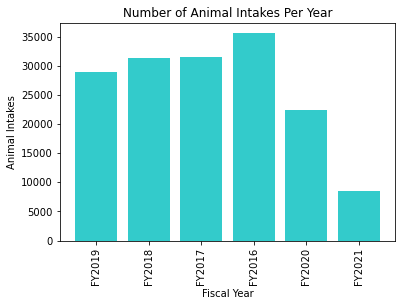

In [46]:
years = dallas_shelter_data["Year"].value_counts()
x_axis = years.index.values

plt.bar(x_axis, yearCount, color='c', alpha=0.8, align='center')
plt.xlabel("Fiscal Year")
plt.ylabel("Animal Intakes")
plt.title("Number of Animal Intakes Per Year")
plt.xticks(rotation="vertical")
plt.show()

